In [53]:
import cv2
import os
import pathlib
import splitfolders
import random
root_path = '/Users/shivanivellanki/Downloads/Rice_Image_Dataset'
root_path = pathlib.Path (root_path)


Imports the OpenCV library for computer vision tasks.
Imports the operating system module for interacting with the file system.
Imports the pathlib module for working with file paths.
Imports the splitfolders library for splitting a dataset into train, validation, and test sets.
Imports the random module for generating random numbers.
Sets the root path to the directory containing the rice image dataset.
Converts the root path to a Path object for easier manipulation.

In [54]:
import matplotlib.pyplot as plt

Imports the pyplot module from the matplotlib library for plotting images.

In [55]:
from keras.preprocessing import image

Imports the image module from the Keras preprocessing library for image preprocessing tasks.

importing dataset

In [56]:
splitfolders.ratio(root_path, output='Images', seed=123, ratio=(.7,.15,.15), group_prefix=None)

Splits the dataset into train, validation, and test sets using a 70-15-15 ratio and saves them in the 'Images' directory.

using splitfolders to create 3 folders Train, Test and Validation

In [57]:
arborio = [fn for fn in os.listdir(f'{root_path}/Arborio') if fn.endswith('.jpg')]
bastmati = [fn for fn in os.listdir(f'{root_path}/Basmati') if fn.endswith('.jpg')]
ipsala = [fn for fn in os.listdir(f'{root_path}/Ipsala') if fn.endswith('.jpg')]
jasmine = [fn for fn in os.listdir(f'{root_path}/Jasmine') if fn.endswith('.jpg')]
karacadag = [fn for fn in os.listdir(f'{root_path}/Karacadag') if fn.endswith('.jpg')]
rice = [arborio, bastmati, ipsala, jasmine, karacadag]

rice_classes = []
for i in os.listdir('Images/train'):
    rice_classes+=[i]
rice_classes.sort()

image_count = len(list(root_path.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(rice_classes)}')
count = 0
rice_count = []
for x in rice_classes:
    print(f'Total {x} images: {len(rice[count])}')
    rice_count.append(len(rice[count]))
    count += 1

Total images: 75000
Total number of classes: 5
Total Arborio images: 15000
Total Basmati images: 15000
Total Ipsala images: 15000
Total Jasmine images: 15000
Total Karacadag images: 15000


using list comprehensions to retrieve a list of filenames with the extension ".jpg" from different directories. It assumes the existence of a variable root_path, which represents the root directory path.

creates a list called arborio. It uses a list comprehension to iterate over the filenames in the directory {root_path}/Arborio and selects only the filenames that end with ".jpg".

 creates a list called bastmati. It follows the same pattern as the previous line but retrieves the filenames from the directory {root_path}/Basmati

 creates a list called ipsala. It retrieves the filenames from the directory {root_path}/Ipsala that end with ".jpg".

 creates a list called jasmine. It retrieves the filenames from the directory {root_path}/Jasmine that end with ".jpg".

 creates a list called karacadag. It retrieves the filenames from the directory {root_path}/Karacadag that end with ".jpg".

 creates a list called rice that contains the previously created lists arborio, bastmati, ipsala, jasmine, and karacadag. Essentially, it creates a list of lists, where each inner list represents the filenames in a specific directory.

 initializes an empty list called rice_classes to store the names of different rice classes. iterates over the contents of the 'Images/train' directory and assigns each item to the variable i.appends the value of i (a rice class name) to the rice_classes list.sorts the rice_classes list in alphabetical order.counts the total number of image files (files with the extension ".jpg") located in all subdirectories under the root_path directory.
 prints the total number of images found in the previous line. prints the total number of rice classes found in the rice_classes list.initializes a variable count with a value of 0, which will be used to access elements of the rice list.initializes an empty list called rice_count to store the counts of images for each rice class.starts a loop that iterates over each rice class name in the rice_classes list.prints the total number of images for the current rice class (x) by accessing the corresponding list of images in the rice list using the count variable.adds the count of images for the current rice class to the rice_count list. increments the count variable to access the next rice class in the rice list.

 To analyze a dataset of rice images. It retrieves the names of different rice classes, counts the total number of images, and provides the count of images for each rice class. This information can be useful for understanding the dataset's composition, performing statistical analysis, or building machine learning models for rice classification tasks.

 

Image dimensions: (250, 250, 3)


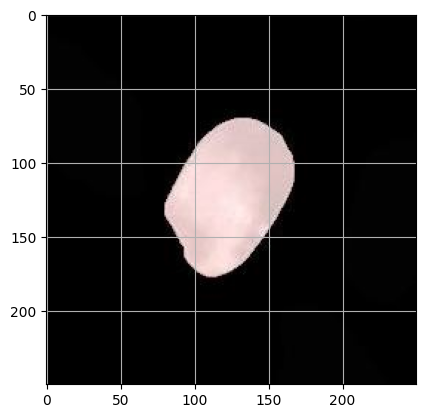

In [58]:
sample_img = cv2.imread('/Users/shivanivellanki/Downloads/Rice_Image_Dataset/Karacadag/Karacadag (26).jpg')
plt.imshow(sample_img)
plt.grid(True)
print(f'Image dimensions: {sample_img.shape}')


To read and display a specific image file and print its dimensions. It uses OpenCV to read the image, matplotlib to display it, and prints the image's dimensions for reference or further analysis.

reads an image file named 'Karacadag (26).jpg' located at the given file path using the cv2.imread() function from the OpenCV library. The image file is assigned to the variable sample_img.
displays the image stored in sample_img using plt.imshow() function from the matplotlib library. This shows the image on the screen.
enables the gridlines on the displayed image using the plt.grid() function. This adds gridlines to the image visualization.
prints the dimensions (height, width, and number of channels) of the image using the sample_img.shape attribute. This provides information about the image's size.

See each types of rice classes

In [59]:
def load_random_img(dir,label):
    plt.figure(figsize=(10,10))
    i=0
    for label in rice_classes:
        i+=1
        plt.subplot(1,5,i)
        file=random.choice(os.listdir(f'{dir}/{label}'))
        image_path=os.path.join(f'{dir}/{label}',file)
        img=cv2.imread(image_path)
        plt.title(label)
        plt.imshow(img)
        plt.grid(None)
        plt.axis('off')


To create a figure with subplots and display random images from the specified directory for each rice class. The images are shown with their respective labels, and the gridlines and axis are turned off for better visualization. The function can be used to quickly inspect a set of random images from different rice classes.

defines a function called load_random_img that takes two parameters: dir represents the directory path where the images are located, and label represents the list of rice classes.creates a new figure for plotting the images and sets its size to 10x10 inches.initializes a counter variable i with a value of 0. It will be used to keep track of the subplot indexloop that iterates over each rice class name in the rice_classes list.
increments the counter i by 1.creates a subplot within the figure. It specifies that there will be 1 row and 5 columns of subplots, and the current subplot's index is determined by i.selects a random file from the directory specific to the current label using random.choice(). It assumes that each rice class has its own subdirectory within the specified dir.constructs the full path to the randomly chosen image file by joining the dir, label, and file using os.path.join().reads the image file located at image_path using the cv2.imread() function and assigns it to the variable img.sets the title of the current subplot to the current label, which represents the rice class name.sets the title of the current subplot to the current label, which represents the rice class name.displays the image img on the current subplot using plt.imshow()


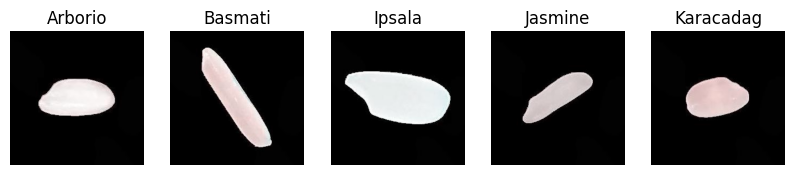

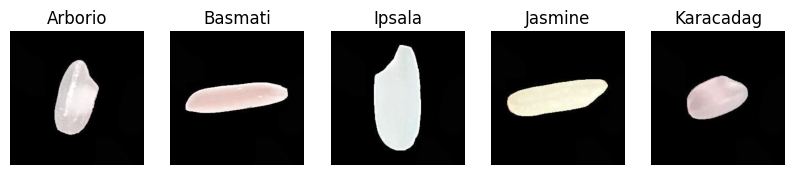

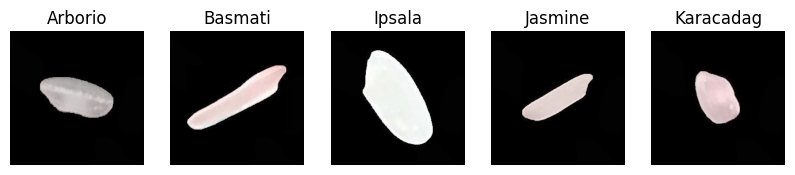

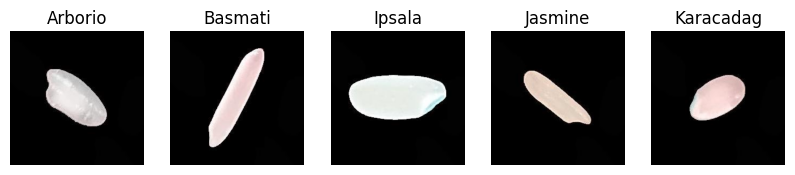

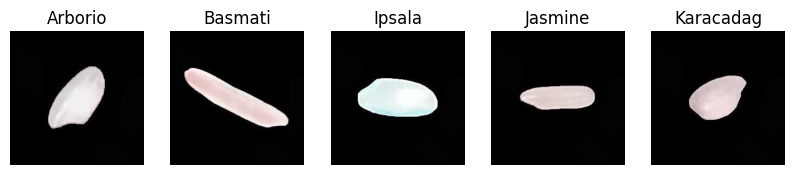

In [60]:
for i in range(5):
    load_random_img(root_path,rice_classes)

To display random images for each rice class multiple times. By looping five times, the function load_random_img is called repeatedly, resulting in the display of different sets of random images for each iteration. This can be useful for visualizing and inspecting different subsets of the rice image dataset.Sets up a loop that iterates five times. The loop variable i takes on values from 0 to 4.calls the load_random_img function, passing the root_path (directory path) and rice_classes (list of rice classes) as arguments. The function is executed once during each iteration of the loop.


In [61]:
arborio = list(root_path.glob('Arborio/*'))[:1000]
basmati = list(root_path.glob('Basmati/*'))[:1000]
ipsala = list(root_path.glob('Ipsala/*'))[:1000]
jasmine = list(root_path.glob('Jasmine/*'))[:1000]
karacadag = list(root_path.glob('Karacadag/*'))[:1000]

the glob() function from the pathlib module is used to retrieve a list of file paths for each rice class, limiting the number of files to 1000 for each class. Here's the breakdown:retrieves a list of file paths located in the 'Arborio' directory under the root_path. The glob() function is used with the pattern 'Arborio/*' to match all files in that directory. The list() function converts the returned generator object to a list. The [:1000] indexing limits the list to the first 1000 file paths.

Fetches the file paths for each rice class and stores them in separate lists (arborio, basmati, ipsala, jasmine, karacadag). Each list is limited to contain a maximum of 1000 file paths. These lists can be used for further processing, such as loading and analyzing the corresponding rice images.

In [62]:
data = {'arborio':arborio, 'basmati':basmati, 'ipsala':ipsala, 'jasmine':jasmine, 'karacadag':karacadag}

rice_labels= {0:"Arborio", 1:"Basmati", 2:"Ipsala", 3:"Jasmine", 4:"Karacadag"}

The data dictionary associates each rice class name (e.g., 'arborio', 'basmati', etc.) with its corresponding list of file paths. Each list (arborio, basmati, etc.) contains a subset of file paths for the respective rice class.The rice_labels dictionary maps numeric labels (0, 1, 2, 3, 4) to their respective rice class names ("Arborio", "Basmati", etc.). It provides a convenient way to associate numerical class labels with their corresponding names.

these dictionaries provide a mapping between rice class names, file paths, and numerical labels. They can be used to organize and access the rice image data, perform classification tasks, or facilitate further analysis and processing of the dataset.

In [63]:
def load_random_img(dir, label):
    plt.figure(figsize=(10,10))
    i=0
    for label in rice_classes:
        i+=1
    plt.subplot(1, 5, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

    

To create a figure with subplots and display a random image for each rice class. The images are shown with their respective labels, and the gridlines and axis are turned off for better visualization. The function can be used to quickly visualize random images from different rice classes.
defines a function called load_random_img that is responsible for loading and displaying a random image from a specified directory and associated label.creates a new figure with a size of 10x10 inches using plt.figure(). This figure will contain the image that is to be displayed.initializes a counter variable i with a value of 0. It will be used to keep track of the subplot index.starts a loop that iterates over each label in the rice_classes list. Note that the loop variable label shadows the function parameter label. increments the counter i by 1 for each iteration of the loop.creates a subplot within the figure. It specifies that there will be 1 row and 5 columns of subplots, and the current subplot's index is determined by i.selects a random file from the specified directory associated with the current label using random.choice(). It assumes that each rice class has its own subdirectory within the specified dir.constructs the full path to the randomly chosen image file by joining the dir label, and file using os.path.join().reads the image file located at image_path using the cv2.imread() function and assigns it to the variable img.sets the title of the current subplot to the current label, which represents the rice class name.displays the image img on the current subplot using plt.imshow().removes the gridlines from the current subplot using plt.grid(). turns off the axis ticks and labels for the current subplot using plt.axis().


In [75]:
arborio = ['/Users/shivanivellanki/Downloads/Rice_Image_Dataset/Arborio/Arborio (30).jpg']
basmati = ['/Users/shivanivellanki/Downloads/Rice_Image_Dataset/Basmati/basmati (17).jpg']
ipsala = ['/Users/shivanivellanki/Downloads/Rice_Image_Dataset/Ipsala/Ipsala (22).jpg']
jasmine = ['/Users/shivanivellanki/Downloads/Rice_Image_Dataset/Jasmine/Jasmine (38).jpg']
karacadag = ['/Users/shivanivellanki/Downloads/Rice_Image_Dataset/Karacadag/Karacadag (21).jpg']


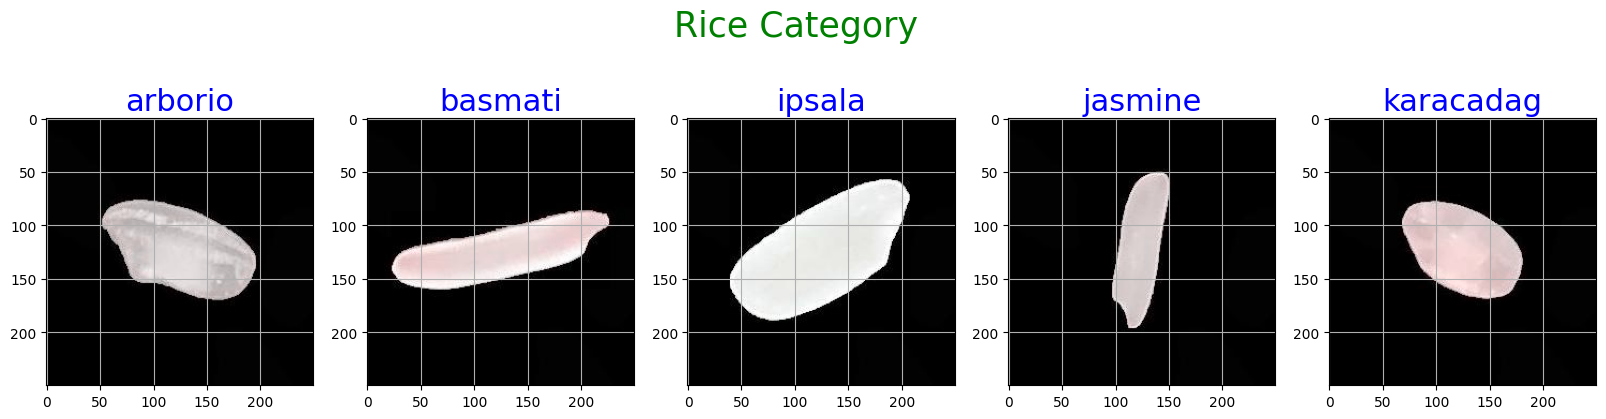

In [91]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category' , color='green',fontsize=25)

arborio_image = cv2.imread(arborio[0])
basmati_image = cv2.imread(basmati[0])
ipsala_image = cv2.imread(ipsala[0])
jasmine_image = cv2.imread(jasmine[0])
karacadag_image = cv2.imread(karacadag[0])
plt.grid(True)


ax[0].set_title('arborio', fontsize=22, color='blue')
ax[1].set_title('basmati', fontsize=22, color='blue')
ax[2].set_title('ipsala', fontsize=22, color='blue')
ax[3].set_title('jasmine', fontsize=22, color='blue')
ax[4].set_title('karacadag', fontsize=22, color='blue')


ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

for axes in ax:
    axes.grid(True)


In [92]:
batch_size = 128
img_height, img_width = 256, 256
input_shape = (img_height, img_width, 3)

In [94]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

In [95]:
Train = datagen.flow_from_directory(
    'Images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = "training",
    class_mode='categorical')

Val = datagen.flow_from_directory(
    'Images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Test = datagen.flow_from_directory(
    'Images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


In [97]:
import tensorflow as tf
import keras
CNN = tf.keras.models.Sequential()

# Convolution
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256,256,3]))

#Pooling
CNN.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2))

#Flattening
CNN.add(tf.keras.layers.Flatten())

#Full Conection
CNN.add(tf.keras.layers.Dense(units=512, activation='relu'))

#Output layer
CNN.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

In [98]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 512)               264258048 
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 264261509 (1008.08 MB)
Trainable params: 264261509 (1008.08 MB)
Non-trainable params: 0 (0.00 Byte)
________

In [99]:
CNN.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [103]:
Model = CNN.fit(x=Train, validation_data=Val, epochs=3)

Epoch 1/3
 13/411 [..............................] - ETA: 46:44 - loss: 0.0043 - accuracy: 0.9970

KeyboardInterrupt: 

In [102]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 512)               264258048 
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 264261509 (1008.08 MB)
Trainable params: 264261509 (1008.08 MB)
Non-trainable params: 0 (0.00 Byte)
________

In [106]:
score = CNN.evaluate(Test, verbose=1)
print(f'Model Loss: {score[0]}, Accuracy: {score[1]*100}')

88/88 [==============================] - 129s 1s/step - loss: 0.0121 - accuracy: 0.9915
Model Loss: 0.012111394666135311, Accuracy: 99.14666414260864


In [107]:
root_path = '/Users/shivanivellanki/Downloads/Rice_Image_Dataset'
class_names = sorted(os.listdir(root_path))
class_names

['.DS_Store',
 'Arborio',
 'Basmati',
 'Ipsala',
 'Jasmine',
 'Karacadag',
 'Rice_Citation_Request.txt']

In [108]:
del class_names[5]

print(class_names)

['.DS_Store', 'Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Rice_Citation_Request.txt']


In [116]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

88/88 [==============================] - 118s 1s/step


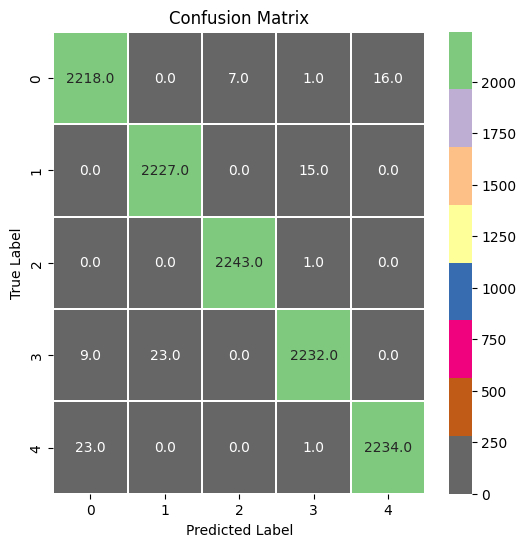

In [117]:
Y_pred = CNN.predict(Test)
y_pred = np.argmax(Y_pred, axis=1) #Max prob between 5 values
confusion_mtx = confusion_matrix(y_pred, Test.classes)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax, cmap=plt.cm.Accent_r)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [12]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [121]:
import pandas as pd
from sklearn.metrics import classification_report

In [128]:
report = classification_report(Test.classes, y_pred, labels=np.unique(Test.classes), output_dict=True)
DF_evaluation = pd.DataFrame(report).transpose()
DF_evaluation.style.apply(highlight_max)

,precision,recall,f1-score,support
0,0.989295,0.985778,0.987533,2250.000000
1,0.993310,0.989778,0.991541,2250.000000
2,0.999554,0.996889,0.998220,2250.000000
3,0.985866,0.992000,0.988923,2250.000000
4,0.989371,0.992889,0.991127,2250.000000
accuracy,0.991467,0.991467,0.991467,0.991467
macro avg,0.991479,0.991467,0.991469,11250.000000
weighted avg,0.991479,0.991467,0.991469,11250.000000


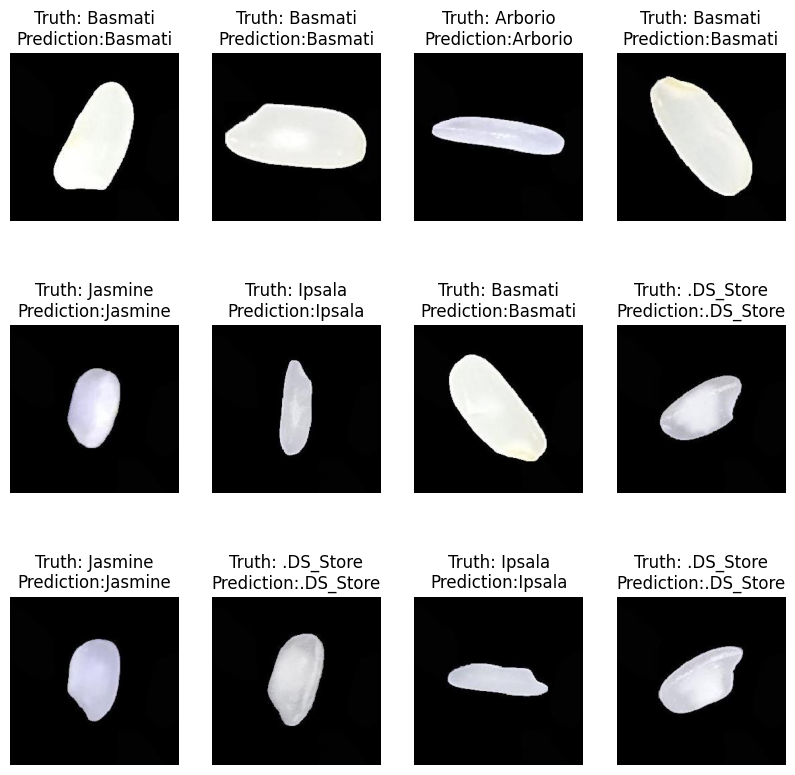

In [129]:
plt.figure(figsize=(10, 10))
#The next function returns a batch from the dataset. The return value is in form of (training features and labels)
x, label= Train.next()  
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x[i])
    result = np.where(label[i]==1)
    predict = CNN(tf.expand_dims(x[i], 0))
    score = tf.nn.softmax(predict[0])
    score_label = class_names[np.argmax(score)]
    plt.title(f'Truth: {class_names[result[0][0]]}\nPrediction:{score_label}')
    plt.axis(False)


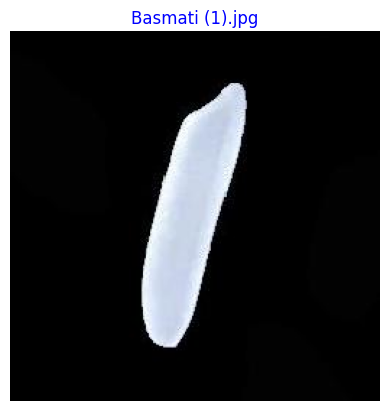

In [132]:
image_path = '/Users/shivanivellanki/Downloads/Rice_Image_Dataset/Basmati/Basmati (1).jpg'
target_size = (256, 256)

# Load the image
Second_Way_Test = tf.keras.utils.load_img(image_path, target_size=target_size)

# Extract the filename from the image path
image_filename = os.path.basename(image_path)

# Display the image
plt.imshow(Second_Way_Test)
plt.title(image_filename , color = 'blue')
plt.axis('off')
plt.show()

In [134]:
image_path = '/Users/shivanivellanki/Downloads/Rice_Image_Dataset/Basmati/Basmati (1).jpg'
target_size = (256, 256)
Second_Way_Test = tf.keras.utils.load_img(image_path, target_size=target_size)

# Convert image to array
Third_Way_Test = tf.keras.utils.img_to_array(Second_Way_Test)
Third_Way_Test = np.expand_dims(Third_Way_Test, axis=0)

# Perform prediction
Result = CNN.predict(Third_Way_Test)

# Define class labels
class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Get the predicted class index
predicted_class_index = np.argmax(Result)

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label and result
print("Predicted Class: ", predicted_class_label)
print("Prediction Result: ", Result)

1/1 [==============================] - 0s 372ms/step
Predicted Class:  Basmati
Prediction Result:  [[0. 1. 0. 0. 0.]]
